In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [3]:
series = 4
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
print(results.columns)
print(key_config_df.columns)
results

Index(['experiment_id', 'client_to_server_latencies_avg',
       'client_to_server_latencies_p99', 'client_to_server_latencies_p50',
       'client_to_server_latencies_var', 'client_to_server_latencies_max',
       'client_to_server_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_server_latencies_avg', 'model_to_server_latencies_p99',
       'model_to_server_latencies_p50', 'model_to_server_latencies_var',
       'model_to_server_latencies_max', 'model_to_server_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttle

,experiment_id,client_to_server_latencies_avg,client_to_server_latencies_p99,client_to_server_latencies_p50,client_to_server_latencies_var,client_to_server_latencies_max,client_to_server_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,38,13.719109,21.400827,14.770096,27.502901,21.501959,1.106776,0.441125,0.574979,0.440406,...,2.268529e+09,9.830112e+16,2.803306e+09,1.960587e+09,0.042015,0.504202,0.000000,1.941793e-02,0.504202,0.000000
1,36,36.103970,65.387816,36.724058,349.502847,65.863168,0.948784,1.288402,1.734572,1.254198,...,2.614010e+09,1.965802e+17,3.251380e+09,2.014630e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,6,8.862712,13.631252,10.081238,13.564004,13.721392,0.929659,0.091959,0.127367,0.089836,...,9.460572e+08,6.114949e+16,1.467679e+09,8.631583e+08,0.039675,0.504202,0.008435,1.542387e-02,0.504202,0.000000
3,33,145.290046,278.484598,149.438715,6700.928510,280.771022,1.450125,4.840108,6.747281,4.249827,...,2.886836e+09,3.591970e+17,3.751141e+09,1.993871e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,11,12.599040,18.885052,14.193107,24.608711,18.939925,1.271152,0.254836,0.443569,0.254632,...,9.952297e+08,1.486007e+17,1.703293e+09,7.450132e+08,0.034613,0.504428,0.000000,1.625914e-02,0.504474,0.000000
5,13,8.398937,11.846452,9.139606,8.668520,11.858843,1.079551,0.106426,0.163032,0.101745,...,9.618964e+08,5.615042e+16,1.312322e+09,7.451279e+08,0.058806,0.503179,0.020833,1.685180e-02,0.503212,0.019700
6,9,35.594531,62.250467,36.582397,320.178992,62.365082,1.471508,1.076355,1.740355,1.007314,...,1.194758e+09,3.394126e+17,2.294649e+09,7.435796e+08,0.023766,0.028957,0.025000,3.085677e-05,0.032261,0.000000
7,37,14.115293,21.215932,15.490222,32.008674,21.299940,1.561785,0.435117,0.620751,0.423065,...,2.227945e+09,1.306953e+17,2.796753e+09,1.872720e+09,0.500734,0.500779,0.500749,3.448840e-09,0.500780,0.500565
8,21,8.806020,13.213680,9.248454,9.040575,13.487044,1.236607,0.160264,0.268913,0.148863,...,1.133036e+09,5.600502e+16,1.549038e+09,9.903841e+08,0.047479,0.502048,0.009722,1.721642e-02,0.502070,0.000000
9,10,33.991822,62.848574,32.611631,316.850470,63.036032,0.935354,0.999929,1.345965,0.994962,...,1.196302e+09,2.843765e+17,2.429428e+09,1.048318e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000


In [4]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['16'],
    'data_type': 'image',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['40Gi'],
    'model_variants': ['yolov5n', 'yolov5m', 'yolov5x'],
    'node_name': 'yolo',
    'pipeline_name': '5-paper-video',
    'repetition': 2,
    'replicas': [1],
    'series': 4,
    'series_meta': 'checking effect of CPU allocation change, \\n cpu type: '
                   'Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'workload_config': {'load_duration': 60, 'loads_to_test': [20, 40]},
    'workload_type': 'static'}


Text(0, 0.5, 'Latency (seconds)')

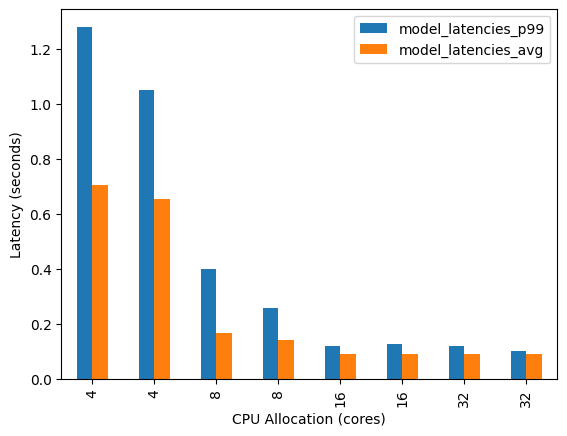

In [16]:
model_variant = 'yolov5n'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

Text(0.5, 1.0, 'CPU Allocation Effect on Latency')

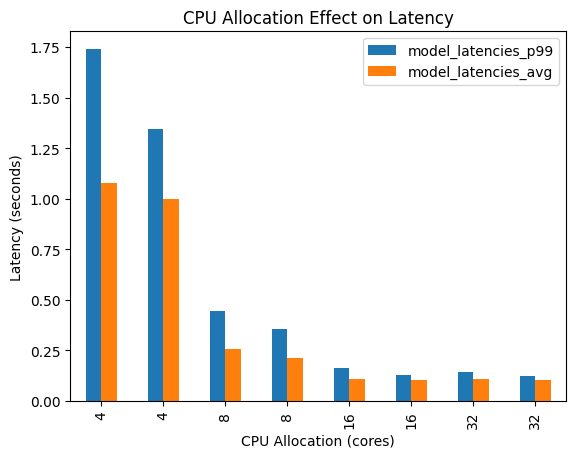

In [17]:
model_variant = 'yolov5s'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5s']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")
ax.set_title('CPU Allocation Effect on Latency')

Text(0.5, 1.0, 'CPU Allocation Effect on Latency')

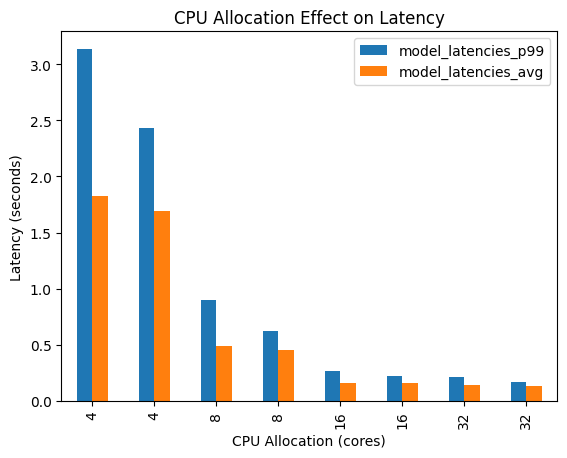

In [18]:
model_variant = 'yolov5m'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")
ax.set_title('CPU Allocation Effect on Latency')

Text(0.5, 1.0, 'CPU Allocation Effect on Latency')

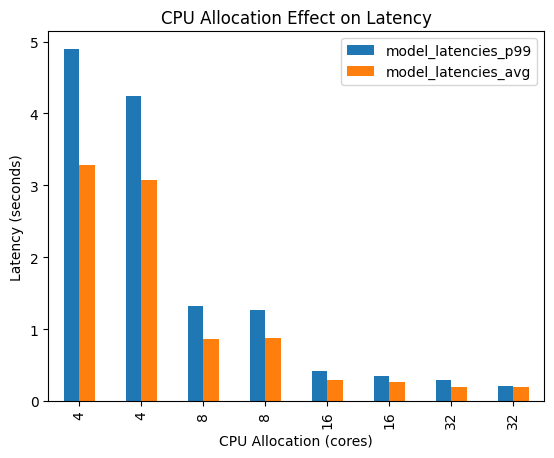

In [19]:
model_variant = 'yolov5l'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")
ax.set_title('CPU Allocation Effect on Latency')

Text(0.5, 1.0, 'CPU Allocation Effect on Latency')

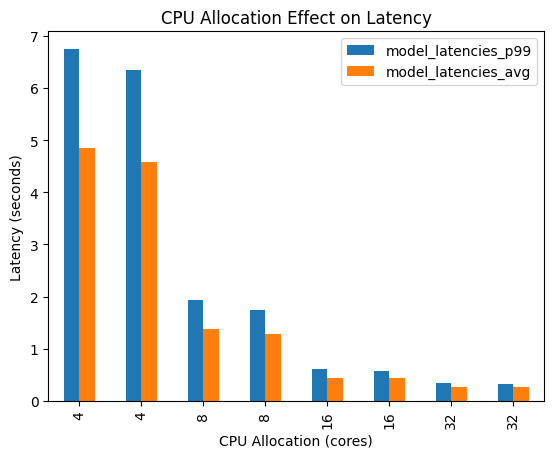

In [20]:
model_variant = 'yolov5x'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")
ax.set_title('CPU Allocation Effect on Latency')

Text(0.5, 1.0, 'CPU Allocation Effect on Latency')

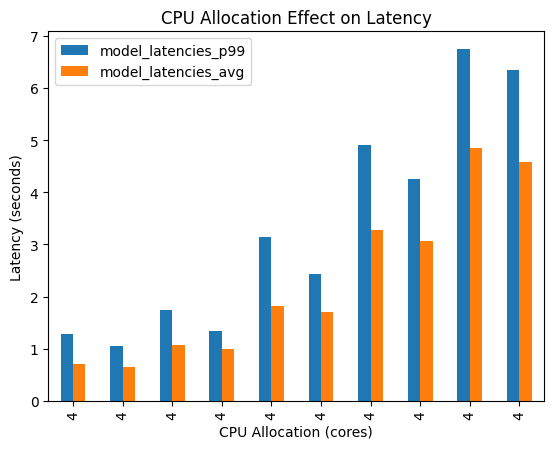

In [21]:
cpu_request = 4
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == cpu_request]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
# display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")
ax.set_title('CPU Allocation Effect on Latency')

,model_variant,memory_usage_max
0,yolov5n,1.995764e+09
1,yolov5n,1.977598e+09
2,yolov5s,2.294649e+09
3,yolov5s,2.429428e+09
4,yolov5m,2.702655e+09
5,yolov5m,2.538136e+09
6,yolov5l,2.899980e+09
7,yolov5l,3.068838e+09
8,yolov5x,3.751141e+09
9,yolov5x,3.632370e+09


Text(0.5, 1.0, 'CPU Allocation Effect on Latency')

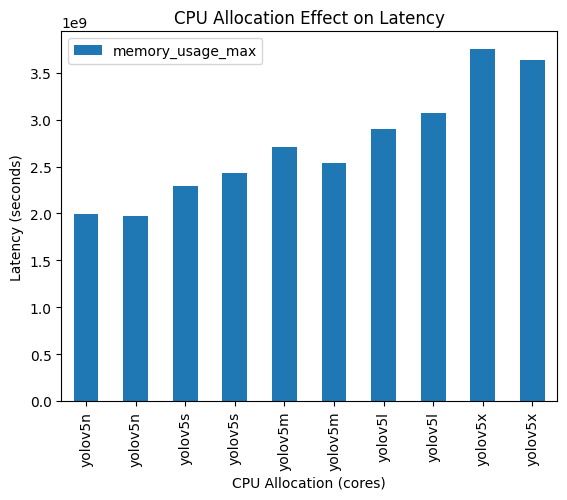

In [24]:
cpu_request = 4
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == cpu_request]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=results_columns)
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")
ax.set_title('CPU Allocation Effect on Latency')